In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hospital_deaths_train.csv')


In [3]:
df.head()

,recordid,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,135031,0,69.0,1.0,172.7,63.7,0,0,0,59.0,...,119.0,4.6,NaN,17.2,63.7,7.41,105.0,2580.0,1.0,12.0
1,132988,0,72.0,1.0,NaN,NaN,0,0,0,NaN,...,NaN,NaN,0.23,21.9,NaN,NaN,NaN,NaN,NaN,NaN
2,136292,0,29.0,0.0,NaN,90.0,0,0,0,37.0,...,124.0,NaN,NaN,11.1,106.3,7.40,103.0,2700.0,1.0,14.0
3,133122,0,73.0,1.0,175.3,89.1,0,1,0,58.0,...,148.0,NaN,NaN,18.3,94.2,7.45,144.0,2115.0,0.0,12.0
4,142184,0,74.0,0.0,NaN,78.0,0,0,1,47.0,...,187.0,NaN,NaN,17.7,NaN,7.26,75.0,2280.0,0.0,18.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Columns: 116 entries, recordid to UrineOutputSum
dtypes: float64(111), int64(5)
memory usage: 2.9 MB


In [5]:
df.shape

(3250, 116)

In [6]:
df.tail()

,recordid,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
3245,135913,0,62.0,0.0,170.2,54.2,0,0,0,72.0,...,115.0,NaN,NaN,21.7,66.8,7.41,1703.0,1080.0,1.0,8.0
3246,142481,0,34.0,1.0,NaN,81.8,1,0,0,84.0,...,193.0,NaN,NaN,10.2,NaN,7.41,NaN,NaN,NaN,NaN
3247,134761,0,60.0,0.0,NaN,60.0,0,0,0,72.0,...,106.0,NaN,3.99,15.1,60.0,7.38,126.0,2580.0,1.0,17.0
3248,140957,0,68.0,0.0,NaN,78.8,0,0,0,NaN,...,NaN,NaN,NaN,11.3,78.8,NaN,NaN,NaN,NaN,NaN
3249,134862,0,62.0,1.0,182.9,80.5,0,1,0,46.0,...,115.0,NaN,NaN,9.4,89.8,7.46,149.0,720.0,0.0,5.0


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(3250, 116)

In [9]:
df['In-hospital_death'].unique()

array([0, 1], dtype=int64)

In [10]:
df.groupby('Age')['In-hospital_death'].mean()

Age
15.0    0.000000
16.0    0.000000
17.0    0.000000
18.0    0.000000
19.0    0.066667
          ...   
86.0    0.312500
87.0    0.295455
88.0    0.181818
89.0    0.290323
90.0    0.282258
Name: In-hospital_death, Length: 76, dtype: float64

In [11]:
np.array(df.columns)

array(['recordid', 'In-hospital_death', 'Age', 'Gender', 'Height',
       'Weight', 'CCU', 'CSRU', 'SICU', 'DiasABP_first', 'GCS_first',
       'Glucose_first', 'HR_first', 'MAP_first', 'NIDiasABP_first',
       'NIMAP_first', 'NISysABP_first', 'RespRate_first', 'SaO2_first',
       'Temp_first', 'DiasABP_last', 'GCS_last', 'Glucose_last',
       'HR_last', 'MAP_last', 'NIDiasABP_last', 'NIMAP_last',
       'NISysABP_last', 'RespRate_last', 'SaO2_last', 'Temp_last',
       'DiasABP_lowest', 'GCS_lowest', 'Glucose_lowest', 'HR_lowest',
       'MAP_lowest', 'NIDiasABP_lowest', 'NIMAP_lowest',
       'NISysABP_lowest', 'RespRate_lowest', 'SaO2_lowest', 'Temp_lowest',
       'DiasABP_highest', 'GCS_highest', 'Glucose_highest', 'HR_highest',
       'MAP_highest', 'NIDiasABP_highest', 'NIMAP_highest',
       'NISysABP_highest', 'RespRate_highest', 'SaO2_highest',
       'Temp_highest', 'DiasABP_median', 'GCS_median', 'Glucose_median',
       'HR_median', 'MAP_median', 'NIDiasABP_median', 'NI

In [12]:
df.isnull().sum().to_list()

[0,
 0,
 0,
 3,
 1515,
 258,
 0,
 0,
 0,
 994,
 49,
 92,
 48,
 985,
 413,
 415,
 410,
 2358,
 1796,
 49,
 994,
 49,
 92,
 48,
 985,
 413,
 415,
 410,
 2358,
 1796,
 49,
 994,
 49,
 92,
 48,
 985,
 413,
 415,
 410,
 2358,
 1796,
 49,
 994,
 49,
 92,
 48,
 985,
 413,
 415,
 410,
 2358,
 1796,
 49,
 994,
 49,
 92,
 48,
 985,
 413,
 415,
 410,
 2358,
 1796,
 49,
 1877,
 1851,
 1849,
 1941,
 50,
 1854,
 3007,
 50,
 1036,
 60,
 50,
 75,
 1481,
 83,
 59,
 803,
 803,
 54,
 993,
 3087,
 2541,
 73,
 1035,
 790,
 1877,
 1851,
 1849,
 1941,
 50,
 1854,
 3007,
 50,
 1036,
 60,
 50,
 75,
 1481,
 83,
 59,
 803,
 803,
 54,
 993,
 3087,
 2541,
 73,
 1035,
 790,
 1190,
 1190,
 1190,
 1190]

In [13]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['Gender',
 'Height',
 'Weight',
 'DiasABP_first',
 'GCS_first',
 'Glucose_first',
 'HR_first',
 'MAP_first',
 'NIDiasABP_first',
 'NIMAP_first',
 'NISysABP_first',
 'RespRate_first',
 'SaO2_first',
 'Temp_first',
 'DiasABP_last',
 'GCS_last',
 'Glucose_last',
 'HR_last',
 'MAP_last',
 'NIDiasABP_last',
 'NIMAP_last',
 'NISysABP_last',
 'RespRate_last',
 'SaO2_last',
 'Temp_last',
 'DiasABP_lowest',
 'GCS_lowest',
 'Glucose_lowest',
 'HR_lowest',
 'MAP_lowest',
 'NIDiasABP_lowest',
 'NIMAP_lowest',
 'NISysABP_lowest',
 'RespRate_lowest',
 'SaO2_lowest',
 'Temp_lowest',
 'DiasABP_highest',
 'GCS_highest',
 'Glucose_highest',
 'HR_highest',
 'MAP_highest',
 'NIDiasABP_highest',
 'NIMAP_highest',
 'NISysABP_highest',
 'RespRate_highest',
 'SaO2_highest',
 'Temp_highest',
 'DiasABP_median',
 'GCS_median',
 'Glucose_median',
 'HR_median',
 'MAP_median',
 'NIDiasABP_median',
 'NIMAP_median',
 'NISysABP_median',
 'RespRate_median',
 'SaO2_median',
 'Temp_median',
 'ALP_first',
 'ALT_first',
 

In [14]:
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

Gender has 0.0923 % missing values
Height has 46.6154 % missing values
Weight has 7.9385 % missing values
DiasABP_first has 30.5846 % missing values
GCS_first has 1.5077 % missing values
Glucose_first has 2.8308 % missing values
HR_first has 1.4769 % missing values
MAP_first has 30.3077 % missing values
NIDiasABP_first has 12.7077 % missing values
NIMAP_first has 12.7692 % missing values
NISysABP_first has 12.6154 % missing values
RespRate_first has 72.5538 % missing values
SaO2_first has 55.2615 % missing values
Temp_first has 1.5077 % missing values
DiasABP_last has 30.5846 % missing values
GCS_last has 1.5077 % missing values
Glucose_last has 2.8308 % missing values
HR_last has 1.4769 % missing values
MAP_last has 30.3077 % missing values
NIDiasABP_last has 12.7077 % missing values
NIMAP_last has 12.7692 % missing values
NISysABP_last has 12.6154 % missing values
RespRate_last has 72.5538 % missing values
SaO2_last has 55.2615 % missing values
Temp_last has 1.5077 % missing values
D

In [24]:
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [30]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum(), replace=True)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

In [31]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print('cat_cols', cat_cols)
print('num_cols', num_cols)

cat_cols []
num_cols ['recordid', 'In-hospital_death', 'Age', 'Gender', 'Height', 'Weight', 'CCU', 'CSRU', 'SICU', 'DiasABP_first', 'GCS_first', 'Glucose_first', 'HR_first', 'MAP_first', 'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first', 'RespRate_first', 'SaO2_first', 'Temp_first', 'DiasABP_last', 'GCS_last', 'Glucose_last', 'HR_last', 'MAP_last', 'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'RespRate_last', 'SaO2_last', 'Temp_last', 'DiasABP_lowest', 'GCS_lowest', 'Glucose_lowest', 'HR_lowest', 'MAP_lowest', 'NIDiasABP_lowest', 'NIMAP_lowest', 'NISysABP_lowest', 'RespRate_lowest', 'SaO2_lowest', 'Temp_lowest', 'DiasABP_highest', 'GCS_highest', 'Glucose_highest', 'HR_highest', 'MAP_highest', 'NIDiasABP_highest', 'NIMAP_highest', 'NISysABP_highest', 'RespRate_highest', 'SaO2_highest', 'Temp_highest', 'DiasABP_median', 'GCS_median', 'Glucose_median', 'HR_median', 'MAP_median', 'NIDiasABP_median', 'NIMAP_median', 'NISysABP_median', 'RespRate_median', 'SaO2_median', 'Temp_median', 'A

In [32]:
for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

recordid             0
In-hospital_death    0
Age                  0
Gender               0
Height               0
                    ..
pH_last              0
MechVentStartTime    0
MechVentDuration     0
MechVentLast8Hour    0
UrineOutputSum       0
Length: 116, dtype: int64

In [33]:
df['In-hospital_death'].value_counts()

0    2799
1     451
Name: In-hospital_death, dtype: int64

In [34]:
x = df.drop('In-hospital_death', axis=1)
y = df['In-hospital_death']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:"  ,X_test.shape)
print("Shape of y_test:"  ,y_test.shape)

Shape of X_train: (2600, 115)
Shape of y_train: (2600,)
Shape of X_test: (650, 115)
Shape of y_test: (650,)


In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state =0)
classifier1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [39]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
print('Ridge Regression Train Score is : ' , classifier1.score(X_train, y_train))
print('Ridge Regression Test Score is : ' , classifier1.score(X_test, y_test))

Ridge Regression Train Score is :  0.9961538461538462
Ridge Regression Test Score is :  0.8723076923076923


In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       569
           1       0.38      0.04      0.07        81

    accuracy                           0.87       650
   macro avg       0.63      0.51      0.50       650
weighted avg       0.82      0.87      0.82       650



In [43]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay #for model evaluation
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[564,   5],
       [ 78,   3]], dtype=int64)

In [44]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)


total=sum(sum(confusion_matrix))

ppv = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('ppv : ', ppv )

npv = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('npv : ', npv)

Sensitivity :  0.8785046728971962
Specificity :  0.375
ppv :  0.9912126537785588
npv :  0.037037037037037035


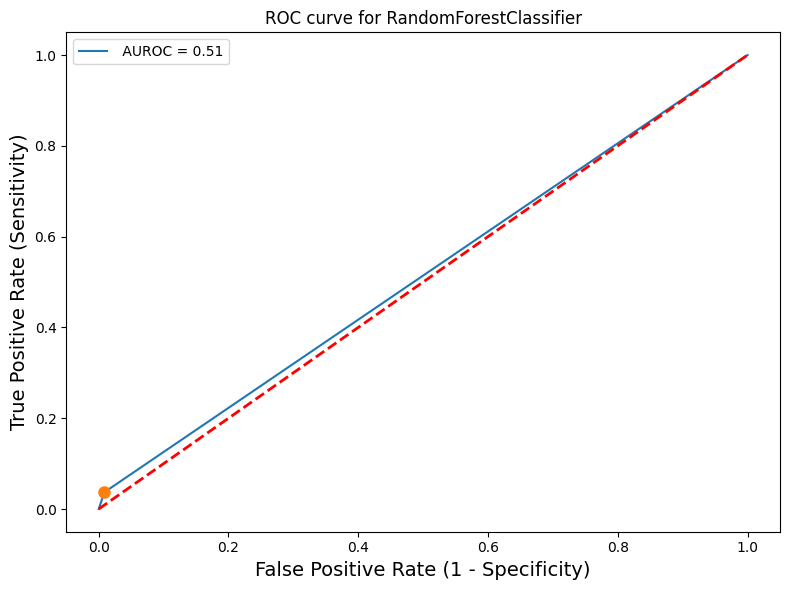

In [45]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [47]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
print('model_xgb Train Score is : ' , model_xgb.score(X_train, y_train))
print('model_xgb Test Score is : ' , model_xgb.score(X_test, y_test))

model_xgb Train Score is :  1.0
model_xgb Test Score is :  0.8830769230769231


In [49]:
# Predicting the Test set results
y_pred1 = model_xgb.predict(X_test)
y_pred1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay #for model evaluation
confusion_matrix2=confusion_matrix(y_test,y_pred1)
confusion_matrix2

array([[556,  13],
       [ 63,  18]], dtype=int64)

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred1)

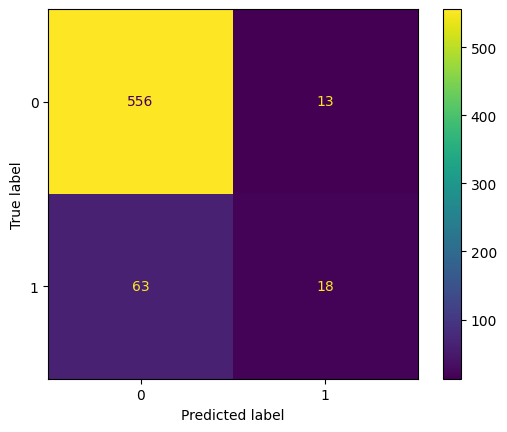

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model_xgb.classes_)
disp.plot()
plt.show()

In [54]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, y_pred1)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, y_pred1)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, y_pred1)

In [55]:
print("The mean_absolute_error",meanabs)
print("The mean_Squre_error",meansq)
print("The Medain_absolute_error",medianab)

The mean_absolute_error 0.11692307692307692
The mean_Squre_error 0.11692307692307692
The Medain_absolute_error 0.0


In [56]:
total=sum(sum(confusion_matrix2))

sensitivity = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8982229402261712
Specificity :  0.5806451612903226


In [57]:
total=sum(sum(confusion_matrix2))

ppv = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[0,1])
print('ppv : ', ppv )

npv = confusion_matrix2[1,1]/(confusion_matrix2[1,0]+confusion_matrix2[1,1])
print('npv : ', npv)

ppv :  0.9771528998242531
npv :  0.2222222222222222


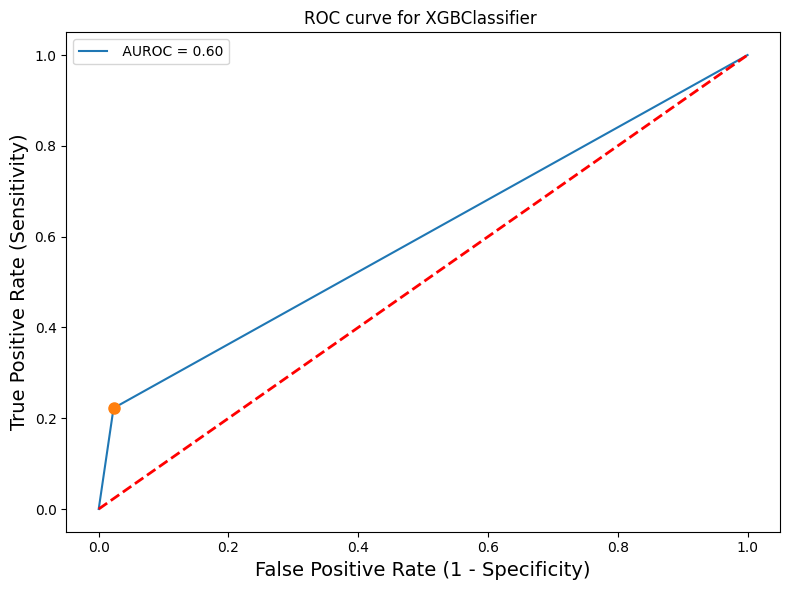

In [58]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred1)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XGBClassifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()